In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats 

>
> `Enlace a la leyenda del Dataset:`
>
>  https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download
>

In [2]:
df = pd.read_csv('ds_salaries.csv', index_col = 0)
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo,
Percentiles 25, 75,
Rango Intercualtílico,
Boxplot de algunas variables,
Tabla de frecuencias,
Variables cualitativas,
Variables cuantitativas,
Frecuencia acumulada,
Representación de al menos una tabla de frecuencias


In [3]:
print('la media de cada columna numérica es:','\n', round(df.mean(),2))

la media de cada columna numérica es: 
 work_year          2021.41
salary           324000.06
salary_in_usd    112297.87
remote_ratio         70.92
dtype: float64


/tmp/ipykernel_31489/4225207348.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('la media de cada columna numérica es:','\n', round(df.mean(),2))


In [4]:
print('la mediana de cada columna numérica es:','\n', round(df.median(),2))

la mediana de cada columna numérica es: 
 work_year          2022.0
salary           115000.0
salary_in_usd    101570.0
remote_ratio        100.0
dtype: float64


/tmp/ipykernel_31489/3477004044.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('la mediana de cada columna numérica es:','\n', round(df.median(),2))


In [5]:
print('la moda de cada columna numérica es:','\n', round(df.mode(),2))

la moda de cada columna numérica es: 
    work_year experience_level employment_type       job_title  salary  \
0     2022.0               SE              FT  Data Scientist   80000   
1        NaN              NaN             NaN             NaN  100000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD       100000.0                 US         100.0   
1             NaN            NaN                NaN           NaN   

  company_location company_size  
0               US            M  
1              NaN          NaN  


In [6]:
print('el máximo de cada columna numérica es:','\n', df.max(axis= 0, numeric_only= True))
print('--------------------')
print('el  mínimo de cada columna numérica es:','\n', df.min(axis = 0, numeric_only= True))

el máximo de cada columna numérica es: 
 work_year            2022
salary           30400000
salary_in_usd      600000
remote_ratio          100
dtype: int64
--------------------
el  mínimo de cada columna numérica es: 
 work_year        2020
salary           4000
salary_in_usd    2859
remote_ratio        0
dtype: int64


In [7]:
# Percentiles 25y  75
q3, q1 = np.percentile(df['salary_in_usd'], [75, 25])
riq = q3 - q1

print("El rango intercuartílico de la variable salario en USD es:", riq)

El rango intercuartílico de la variable salario en USD es: 87274.0


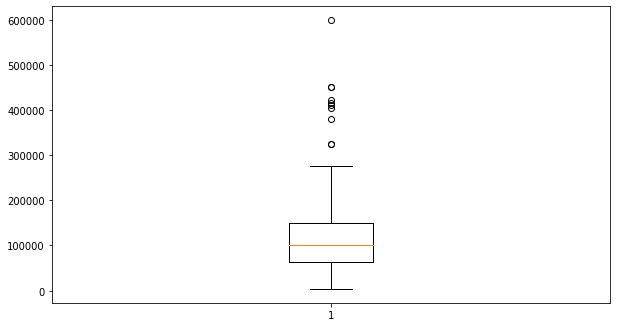

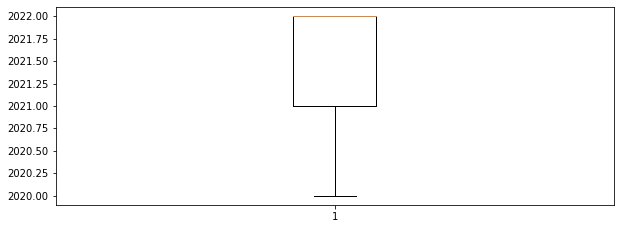

In [8]:
# Boxplot de las variables 'salary in usd' y 'work year'

fig1 = plt.figure(1,figsize=(10,12))
fig2 = plt.figure(2,figsize=(10,8))
ax1 = fig1.add_subplot(2,1,1)
ax2 = fig2.add_subplot(2,1,2)

bp1 = ax1.boxplot(df['salary_in_usd'])
bp2 = ax2.boxplot(df['work_year'])
#ax1.set_ylim([40000, 350000]) #Utilizaremos esta línea de código para ver en más detalle el riq

plt.show()


In [9]:
# Tabla de frecuencias de una variable cualitativa
# Primero agrupamos el dataframe por la columna 'job_title'

group_jobs = df.groupby("job_title")

# Aplicamos el método agg para contar los datos por la columa job_title
frecuencias_jobs = group_jobs.agg(frecuencia=("job_title", "count"))
 
frecuencias_jobs


,frecuencia
job_title,
3D Computer Vision Researcher,1
AI Scientist,7
Analytics Engineer,4
Applied Data Scientist,5
Applied Machine Learning Scientist,4
BI Data Analyst,6
Big Data Architect,1
Big Data Engineer,8
Business Data Analyst,5


In [10]:
# Tabla de frecuencias para una variable cuantitativas
# Cortamos en rangos para facilitar la visualización, teniendo en cuenta el máximo y el mínimo

df['intervalos_salario'] = pd.cut(df['salary_in_usd'], bins = (2500, 12000, 20000, 40000, 60000, 80000, 160000, 200000, 320000, 500000, 600000))

In [11]:
group_salaries = df.groupby('intervalos_salario')
frecuencias_salaries = group_salaries.agg(frecuencia = ('intervalos_salario', 'count'))
frecuencias_salaries

,frecuencia
intervalos_salario,
"(2500, 12000]",18
"(12000, 20000]",17
"(20000, 40000]",40
"(40000, 60000]",68
"(60000, 80000]",80
"(80000, 160000]",263
"(160000, 200000]",67
"(200000, 320000]",44
"(320000, 500000]",9


In [12]:
# Calculamos la frecuencia acumulada de los intervalos de salario y lo añadimos a una columna nueva

frecuencias_salaries['frecuencia_acumulada_salarios']= frecuencias_salaries['frecuencia'].cumsum()
frecuencias_salaries


,frecuencia,frecuencia_acumulada_salarios
intervalos_salario,,
"(2500, 12000]",18,18
"(12000, 20000]",17,35
"(20000, 40000]",40,75
"(40000, 60000]",68,143
"(60000, 80000]",80,223
"(80000, 160000]",263,486
"(160000, 200000]",67,553
"(200000, 320000]",44,597
"(320000, 500000]",9,606


2. Interpretación de los resultados.
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

##### `salary_in_usd`

Interpretando los resultados obtenidos para la variable '**salary_in_usd**' vemos lo siguiente:

* La mayoría de los trabajadores encuestados ganan por encima de los `50.000$` hasta los `150.000$`, estando la mediana en los `100.000$`, que es a la vez el salario más repetido, de acuerdo a los resultados de la **moda**.
* La **mediana** solo se desvía `11.000$` aproximados de la **media**, lo cual indica que el conjunto de datos es bastante uniforme.
* Sin embargo, como vemos en el **boxplot**, también tenemos *outliers* que se acercan al valor máximo del conjunto, `600.000$`.
* El salario más frecuente se encuentra en un rango entre `(80000, 160000]$`	

##### `work_year`

Los resultados para **'work_year'** nos indican que:
* La mayoría de los registros corresponden a los años `2021` y `2022`, estando la **mediana** en el 2022 y la **media** muy cercana a tansolo `0.59` años de diferencia (osea, 6 meses).
* Esto indica que, aunque la mayoría de datos son del `2022`, el conjunto es muy uniforme. Y esto se ve también porque no hay *outliers* en el **boxplot**
